# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab</center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [ ]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

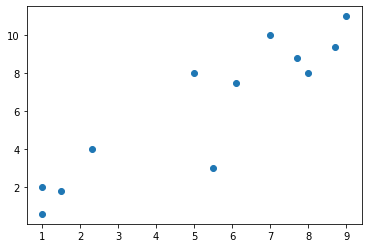

In [ ]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [ ]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [ ]:
# define the model
model = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# train the model
model.fit(training_X, training_y)

SVC(kernel='linear')

weights:  [[0.1332713  0.42667492]]
y-offset:  [-3.01308577]


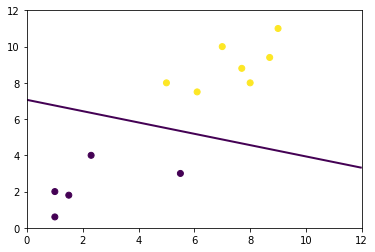

In [ ]:
# get the weight values for the linear equation from the trained SVM model
weights = model.coef_
print("weights: ", weights)

# get the y-offset for the linear equation
y_offset = model.intercept_
print("y-offset: ", y_offset)

# make the x-axis space for the data points
# get the y-values to plot the decision boundary
# plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 12, 500),np.linspace(0, 12, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)

# show the plot visually
plt.scatter(X, y, c=training_y, marker='o')

#plt.legend()

**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

In [ ]:
#Write your code here.

#Loading the data set
data = pd.read_csv("data_banknote_authentication.txt", header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.columns = ['f1', 'f2', 'f3', 'f4', 'label']
data.head()

,f1,f2,f3,f4,label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
X = data.drop('label', axis=1)
y = data['label']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9854545454545455


In [ ]:
# Learning and testong the model for different hyperparameters and check the accuracy.

svm = SVC()

param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3, 4]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Test the model with the best hyperparameters
best_svm = grid_search.best_estimator_
accuracy = best_svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Best hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Accuracy: 1.0


**Problem 3)** Classify the given data using non-linear SVM.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [ ]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

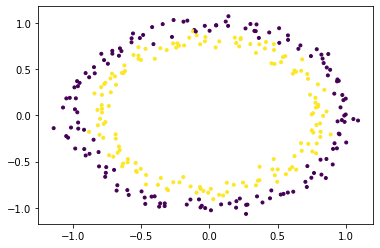

In [ ]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [ ]:
# make non-linear algorithm for model
model = svm.SVC(gamma='scale', kernel='rbf')

In [ ]:
# training non-linear model
model.fit(circle_X, circle_y)

SVC()

In [ ]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 500),np.linspace(-1.25, 1.25, 500))

	# shape data
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
	# get the decision boundary based on the model
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='o')
    
    # plot decision boundary
    plt.show()

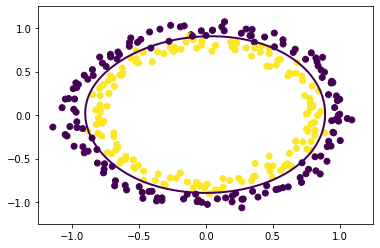

In [ ]:
# plot data and decision boundary
plot_decision_boundary(model)